<a href="https://colab.research.google.com/github/aragaoian/dip-notebooks/blob/master/notebooks/filtros_espaciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens <br>
Alunos: Ian Callegari Aragão, Lucas Losekann Rosa e Lucas Carvalho de Borba

# Exercício Avalitivo de Filtragem Espacial

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

## Upload da imagem

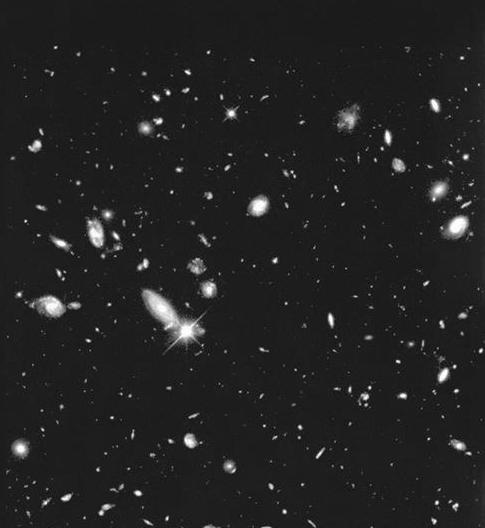

In [ ]:
img = cv2.imread("Fig0334(a)(hubble-original).tif")
cv2_imshow(img)

## BGR para Grayscale

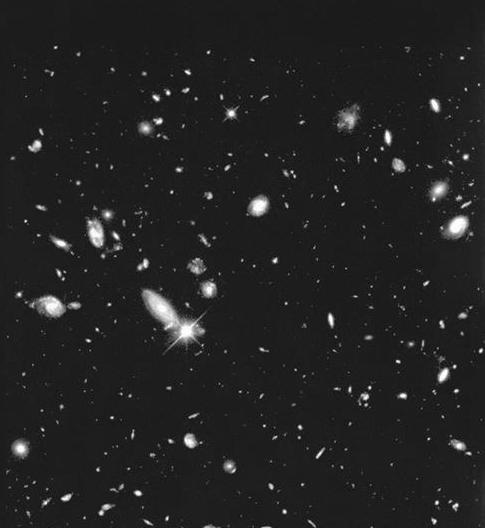

In [ ]:
B, G, R = cv2.split(img)
img_div = (B/3 + G/3 + R/3)
img_grayscale = np.array(img_div, dtype=np.uint8)

cv2_imshow(img_grayscale)

## Utils

In [ ]:
def add_padding(img, padding_height, padding_width):
    h, w = img.shape

    padded_img = np.zeros((h + padding_height * 2, w + padding_width * 2))
    padded_img[padding_height : h + padding_height, padding_width : w + padding_width] = img

    return padded_img

In [ ]:
def conv2d(img, kernel, padding=True, floatOut=False):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape

    # Get dimensions of the image
    img_height, img_width = img.shape

    # Calculate padding required
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Create a padded version of the image to handle edges
    if padding:
        img = add_padding(img, pad_height, pad_width)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)

    # Perform convolution

    # print(f"Height: {img_height}")
    # print(f"Width: {img_width}")

    # Iterate only on original image
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            accumulation = 0
            for u in range(k_height):
                for v in range(k_width):
                    # Accumulate pixel and neighboors, multiplying kernel entry
                    # with the corresponding pixel entry
                    accumulation += kernel[u, v] * img[i - pad_height + u, j - pad_width + v]
            output[i-pad_height,j-pad_width] = accumulation
    if(floatOut):
      return output
    else:
      return np.array(output, dtype=np.uint8)

In [ ]:
def create_tight_plot(img, kernels, filter_name, k_size, hasKernel=True):
    fig, axs = plt.subplots(nrows=1, ncols=len(kernels)+1, figsize=(10, 8))
    fig.suptitle(filter_name, y=0.75, fontsize=16)

    axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)
    axs[0].set_title("Imagem original")
    axs[0].axis("off")

    for i,kernel in enumerate(kernels):
        if hasKernel:
            k_size,_ = kernel.shape
            output = conv2d(img, kernel)
            axs[(i+1)].imshow(output, cmap="gray", vmin=0, vmax=255)
            axs[(i+1)].set_title(f"Kernel {k_size}x{k_size}")
        else:
            axs[(i+1)].imshow(kernel, cmap="gray", vmin=0, vmax=255) # computed convolution
            axs[(i+1)].set_title(f"Kernel {k_size[i]}x{k_size[i]}")

        axs[(i+1)].axis("off")

    plt.tight_layout()
    plt.show()

### Suavização

1. Implemente a sua própria convolução manualmente, em formato de função, utilizando os conceitos vistos em aula
2. Aplique a filtragem de suavização, com as máscaras 3x3, 5x5 e 7x7, com os filtros:
 - média
 - gaussino (escolha uma distribuição adequada, podendo utilizar a função acima ou recuperando a distribuição usada na OpenCV)
 - mediana
3. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels


Em todos os filtros apresentados, à medida que se aumenta o tamanho do kernel, a imagem tende a perder definição de bordas e ficar mais esmaecida. Isso ocorre porque kernels menores conseguem preservar melhor detalhes e nuances, ao contrário de kernels maiores que atuam de forma mais generalista, ocasionando na perde de detalhes e qualidade da imagem.

No entanto, cada filtro apresenta suas particularidades:

1. **Filtro da Média**: aplica uma suavização uniforme, mas pode borrar bastante as bordas e não é tão eficaz contra ruídos.

2. **Filtro Gaussiano**: realiza uma suavização mais natural, preservando melhor as bordas que a média.

3. **Filtro da Mediana**: é especialmente eficiente na remoção de ruídos do tipo sal e pimenta, preservando bordas com mais eficiência que os outros dois, embora possa alterar regiões texturizadas.

Portanto, a escolha do tamanho do kernel e do tipo de filtro deve considerar o contexto da aplicação: kernels menores preservam detalhes, enquanto kernels maiores reduzem ruídos de forma mais agressiva; já o tipo de filtro define qual será a regularidade da suavização, preservação de bordas ou elimação de ruídos de forma mais eficiente.


---



#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255.


### Média



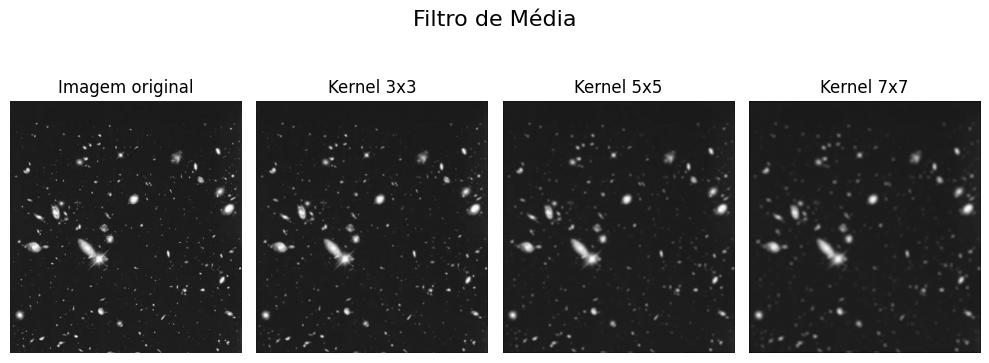

In [ ]:
def avg_create(size_x=3, size_y=3):
    return 1/(size_x * size_y) * np.ones((size_x, size_y))

avg_kernels = [
    avg_create(3,3),
    avg_create(5,5),
    avg_create(7,7)
]

create_tight_plot(img=img_grayscale, kernels=avg_kernels, k_size=None, filter_name="Filtro de Média")

### Gaussiano

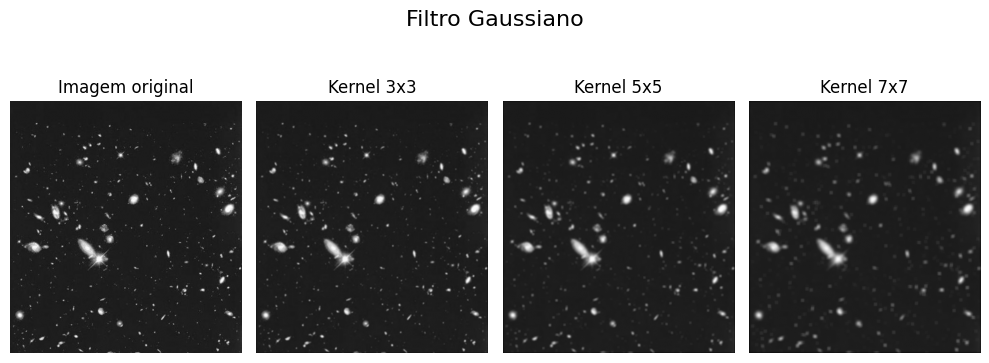

In [ ]:
def gauss_create(size_x=3, size_y=3, sigma=31):
    '''
    Create normal (gaussian) distribuiton
    '''
    x = np.linspace(-(size_x - 1) / 2, (size_x - 1) / 2, size_x)
    y = np.linspace(-(size_y - 1) / 2, (size_y - 1) / 2, size_y)
    x, y = np.meshgrid(x, y)

    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(x**2 + y**2)/(2*(sigma**2)))
    return (exp*calc) / np.sum(exp*calc)

gauss_kernels = [
    gauss_create(3,3),
    gauss_create(5,5),
    gauss_create(7,7)
]

create_tight_plot(img=img_grayscale, kernels=gauss_kernels, k_size=None, filter_name="Filtro Gaussiano")

### Mediana

In [ ]:
import math

def partition(arr, low, high):

    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

    return arr

def calc_median(arr):
    n = len(arr)
    sorted_arr = quick_sort(arr, 0, n-1)

    if n % 2 != 0:
        idx = (n+1) // 2 - 1
        return sorted_arr[idx]
    else:
        mid1 = sorted_arr[n // 2 - 1]
        mid2 = sorted_arr[n // 2]
        return (mid1 + mid2) / 2


def median_create(img, kernel_size=3, padding=True):

    # Get dimensions of the image
    img_height, img_width = img.shape

    # Calculate padding required
    pad_height = kernel_size // 2
    pad_width = kernel_size // 2

    # Create a padded version of the image to handle edges
    if padding:
        img = add_padding(img, pad_height, pad_width)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)

    # Perform convolution
    # Iterate only on original image
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            accumulation = []
            for u in range(kernel_size):
                for v in range(kernel_size):
                    # Accumulate pixel and neighboors, multiplying kernel entry
                    # with the corresponding pixel entry
                    accumulation.append(img[i - pad_height + u, j - pad_width + v])
            output[i-pad_height,j-pad_width] = calc_median(accumulation)
    return np.array(output, dtype=np.uint8)

In [ ]:
mean = 0
std_dev = 1 # Adjust standard deviation for noise intensity
gaussian_noise = np.random.normal(mean, std_dev, img_grayscale.shape).astype(np.uint8)
noisy_img_grayscale_gaussian = cv2.add(img_grayscale, gaussian_noise) # This method already clips the value

median_kernels = [
    median_create(noisy_img_grayscale_gaussian, 3),
    median_create(noisy_img_grayscale_gaussian, 5),
    median_create(noisy_img_grayscale_gaussian, 7),
]

(528, 485)


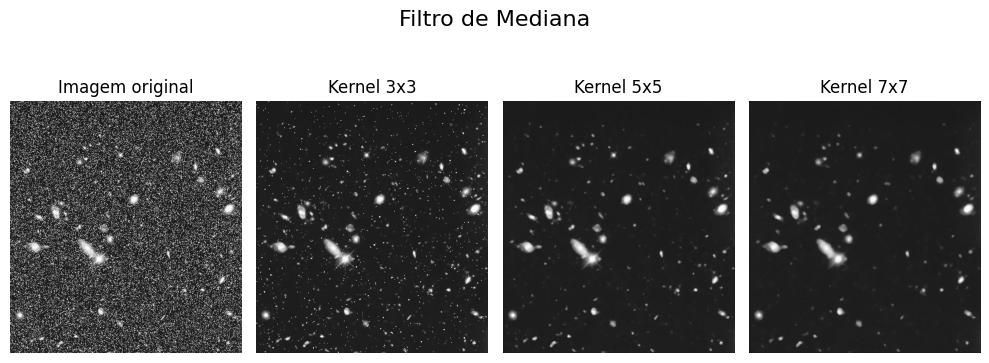

In [ ]:
print(noisy_img_grayscale_gaussian.shape)

create_tight_plot(noisy_img_grayscale_gaussian, median_kernels,"Filtro de Mediana", [3,5,7], False)

##Sharpening

4. Implemente os filtros de sharpening, utilizando as diferentes mascarás apresentadas no livro de referência da disciplina:
 - Laplaciano (figura 3.37)
 - Sharpening implementado na figura 3.38
 - Unsharp Masking e Highboost Filtering
 - Implemente os detectores de borda Laplaciano, Roberts e Sobel
 - Utilize a função Canny da OpenCV na mesma imagem usando nos outros detectores

5. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels e para os diferentes algoritmos<br>
> Nas imagens de saída, o Laplaciano parece mais rápido, porém introduz ruído. O Sobel cria bordas que são mais suaves e homogêneas, enquanto o Roberts resulta em contornos que são menos claros e mais suscetíveis ao ruído. O Canny se destaca por produzir bordas finas, contínuas e quase isentas de ruído.

6. Você observa uma discrepante melhoria na detecção de bordas pelo Canny em comparação aos outros 3 que justifique a complexidade adicional?
> Acredito que a melhoria do Canny justifica a complexidade sim, ele gera contornos mais precisos e uniformes, com menos ruído, ao passo que as técnicas de Laplaciano, Sobel e Roberts não alcançam o mesmo padrão de clareza ou definição.

7. Aplique o filtro Sobel pós operação com um filtro de suavização (a sua escolha) e compare com a saída do Canny. Descreva suas observações técnicas sobre o comportamento.
> O filtro Sobel pós suavização produziu bordas mais grossas e menos definidas, enquanto o filtro Canny apresenta contornos finos e extremamente delineados. Isso se dá principalmente pela etapa do non-max suppression, que zera os pixels que não são o máximo da sua vizinhança imediata, o que produz bordas mais finas e contínuas.

###Laplace

In [ ]:
def laplace_create(size_x: int, size_y: int, connectivity: int = 4, inverted = False) -> np.ndarray:
  if size_x < 3 or size_y < 3 or size_x % 2 == 0 or size_y % 2 == 0:
        raise ValueError("size_x and size_y must be odd integers ≥ 3.")
  if connectivity not in (4, 8):
      raise ValueError("connectivity must be 4 or 8.")

  k = np.zeros((size_y, size_x), dtype=float)
  cy, cx = size_y // 2, size_x // 2

  if connectivity == 4:
      k[cy, cx] = -4.0
      k[cy, cx - 1] = 1.0
      k[cy, cx + 1] = 1.0
      k[cy - 1, cx] = 1.0
      k[cy + 1, cx] = 1.0
  else:  # connectivity == 8
      k[cy, cx] = -8.0
      for dy in (-1, 0, 1):
          for dx in (-1, 0, 1):
              if dy == 0 and dx == 0:
                  continue
              k[cy + dy, cx + dx] = 1.0

  if inverted:
    k = -k

  return k

def laplace_apply(img, alpha = 1):
  return img + alpha * conv2d(img, laplace_create(3,3,4,-1), True, True)

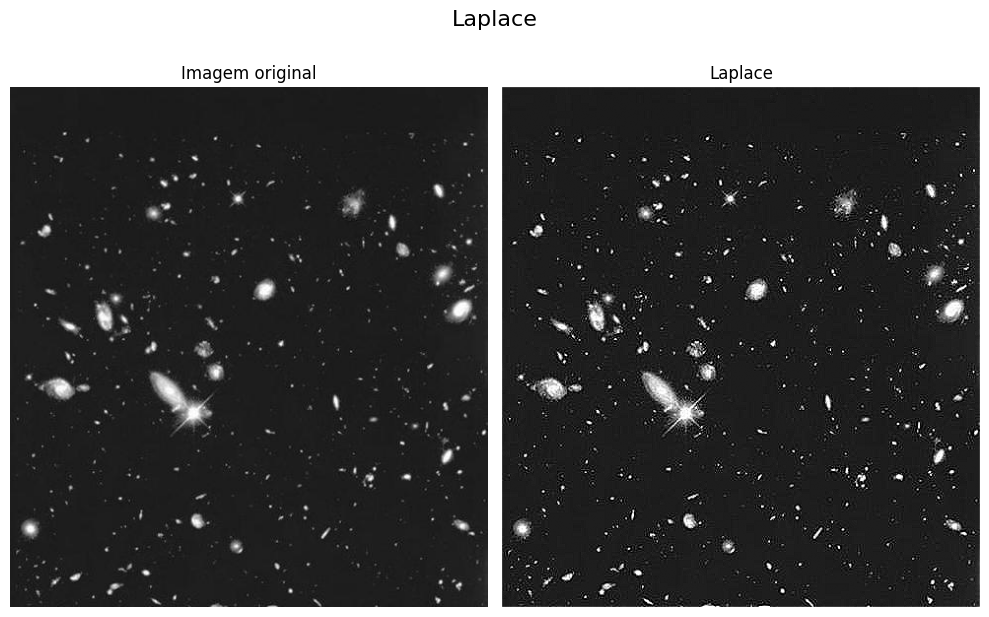

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
fig.suptitle("Laplace", y=0.9, fontsize=16)

axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Imagem original")
axs[0].axis("off")



laplace =laplace_apply(img_grayscale, 1)
axs[1].imshow(laplace, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Laplace")
axs[1].axis("off")

plt.tight_layout()
plt.show()



### Unsharp Masking and Highboost Filtering

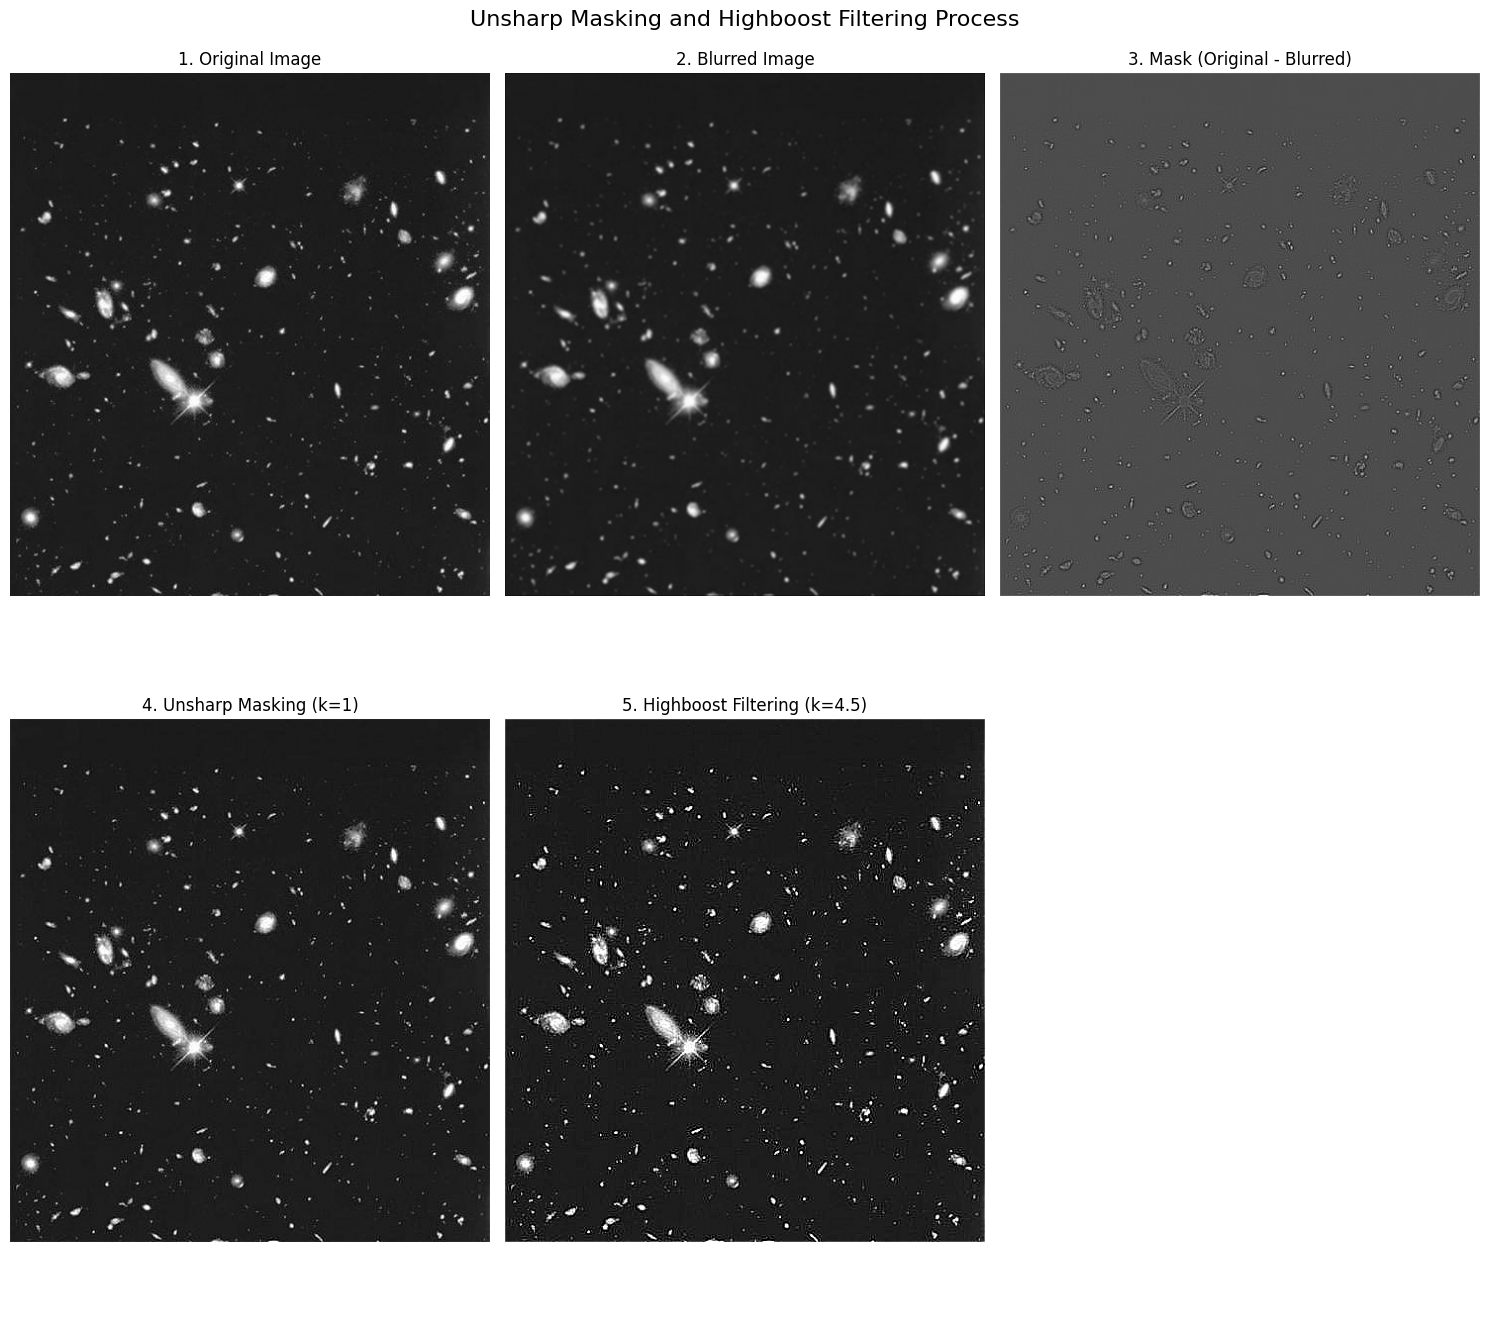

In [ ]:
def visualize_unsharp_steps(img, k=2.5, kernel_size=3, sigma=5):

    gauss_kernel = gauss_create(kernel_size, kernel_size, sigma)

    original = img.copy()

    blurred = conv2d(img.astype(float), gauss_kernel, padding=True, floatOut=True)
    blurred_uint8 = np.clip(blurred, 0, 255).astype(np.uint8)

    mask = img.astype(float) - blurred
    mask_normalized = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    unsharp = img.astype(float) + 1 * mask
    unsharp = np.clip(unsharp, 0, 255).astype(np.uint8)

    highboost = img.astype(float) + k * mask
    highboost = np.clip(highboost, 0, 255).astype(np.uint8)

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 14))
    fig.suptitle("Unsharp Masking and Highboost Filtering Process", y=0.95, fontsize=16)

    # Original
    axs[0, 0].imshow(original, cmap="gray", vmin=0, vmax=255)
    axs[0, 0].set_title("1. Original Image")
    axs[0, 0].axis("off")

    # Blurred
    axs[0, 1].imshow(blurred_uint8, cmap="gray", vmin=0, vmax=255)
    axs[0, 1].set_title("2. Blurred Image")
    axs[0, 1].axis("off")

    # Mask
    axs[0, 2].imshow(mask_normalized, cmap="gray", vmin=0, vmax=255)
    axs[0, 2].set_title("3. Mask (Original - Blurred)")
    axs[0, 2].axis("off")

    # Unsharp
    axs[1, 0].imshow(unsharp, cmap="gray", vmin=0, vmax=255)
    axs[1, 0].set_title("4. Unsharp Masking (k=1)")
    axs[1, 0].axis("off")

    # Highboost
    axs[1, 1].imshow(highboost, cmap="gray", vmin=0, vmax=255)
    axs[1, 1].set_title(f"5. Highboost Filtering (k={k})")
    axs[1, 1].axis("off")

    axs[1, 2].axis("off")

    plt.tight_layout()
    plt.show()

visualize_unsharp_steps(img_grayscale, k=4.5, kernel_size=3, sigma=50)

##Detectores de borda

In [ ]:
def sobel_create_apply(img):
    # Sobel horizontal e vertical
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

    gx = conv2d(img, Kx, padding=True, floatOut=True)
    gy = conv2d(img, Ky, padding=True, floatOut=True)

    # Magnitude do gradiente
    magnitude = np.sqrt(gx**2 + gy**2)
    magnitude = np.clip(magnitude, 0, 255)
    return magnitude.astype(np.uint8)

def roberts_create_apply(img):
    # Kernels Roberts 2x2
    Kx = np.array([[1, 0],
                   [0, -1]])
    Ky = np.array([[0, 1],
                   [-1, 0]])

    gx = conv2d(img, Kx, padding=True, floatOut=True)
    gy = conv2d(img, Ky, padding=True, floatOut=True)

    magnitude = np.sqrt(gx**2 + gy**2)
    magnitude = np.clip(magnitude, 0, 255)
    return magnitude.astype(np.uint8)

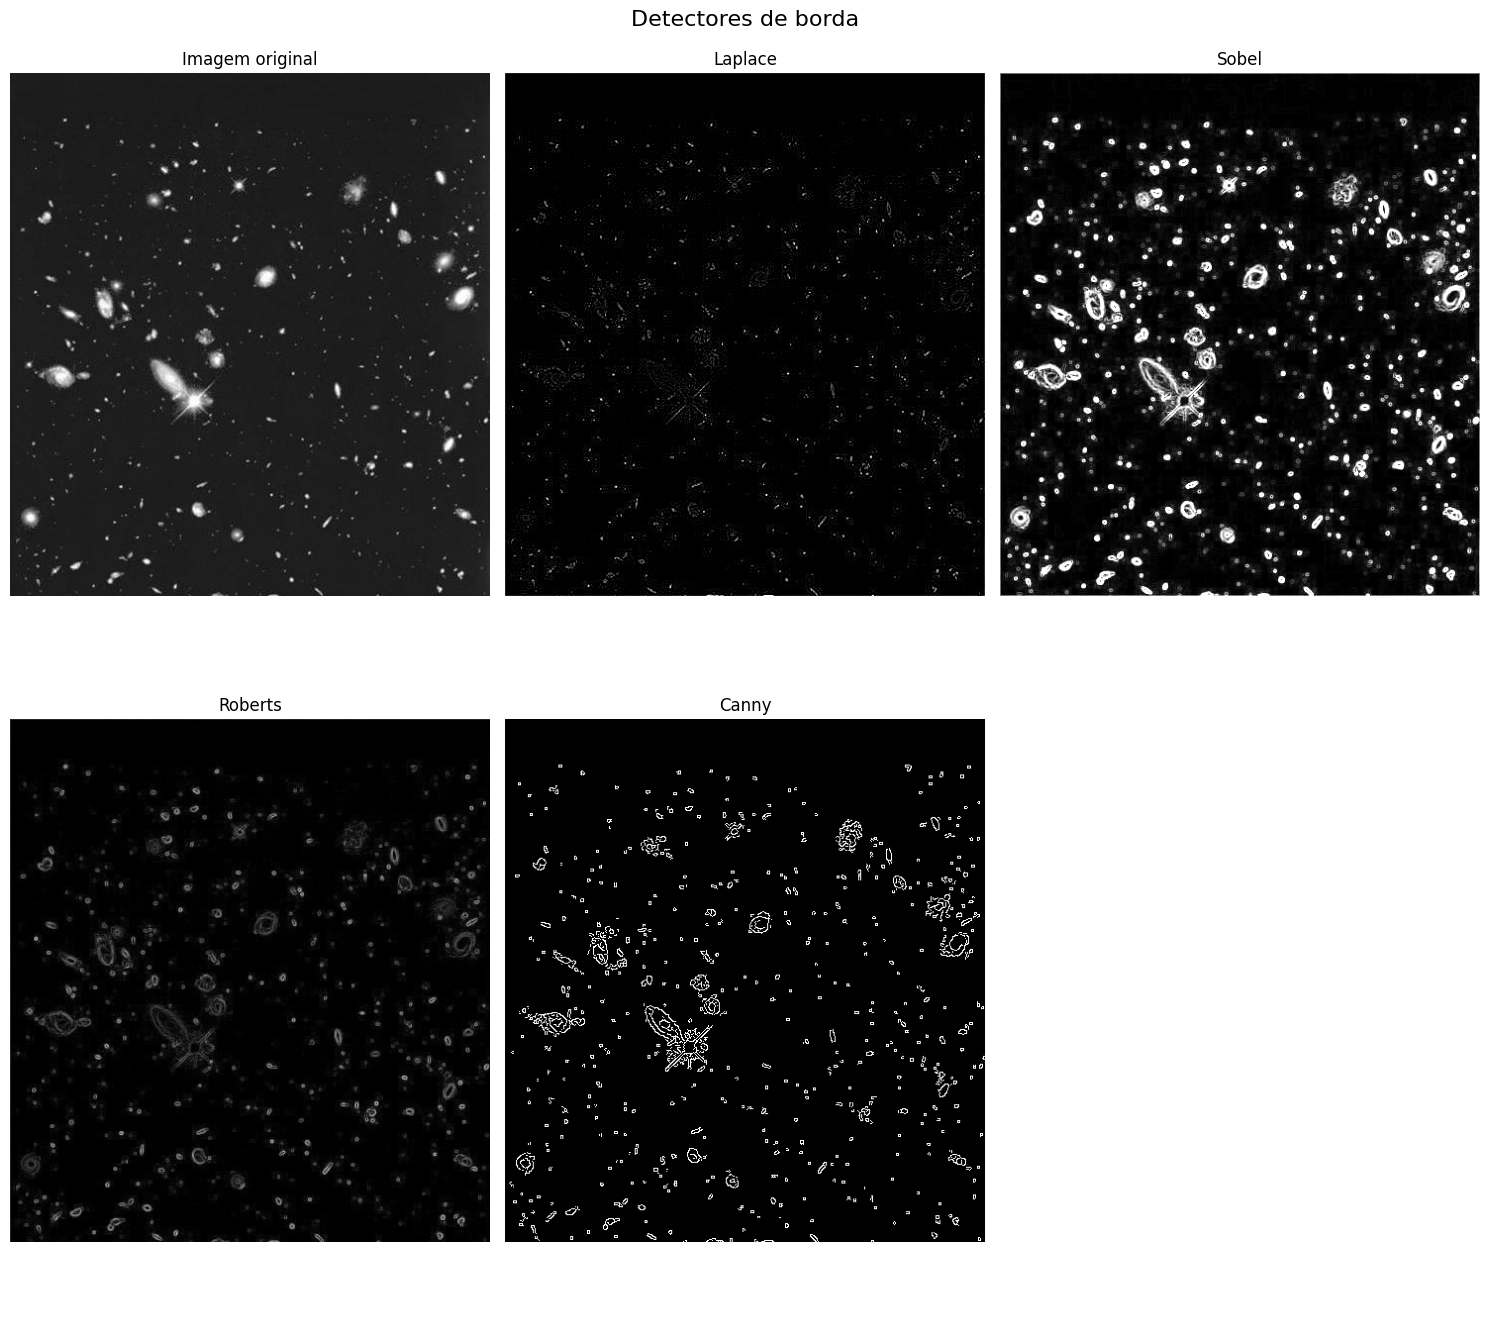

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 14))
fig.suptitle("Detectores de borda", y=0.95, fontsize=16)

axs[0,0].imshow(img, cmap="gray", vmin=0, vmax=255)
axs[0,0].set_title("Imagem original")
axs[0,0].axis("off")

axs[0,1].imshow(conv2d(img_grayscale, laplace_create(3,3,4,-1), True, True), cmap="gray", vmin=0, vmax=255)
axs[0,1].set_title("Laplace")
axs[0,1].axis("off")

axs[0,2].imshow(sobel_create_apply(img_grayscale), cmap="gray", vmin=0, vmax=255)
axs[0,2].set_title("Sobel")
axs[0,2].axis("off")

axs[1,0].imshow(roberts_create_apply(img_grayscale), cmap="gray", vmin=0, vmax=255)
axs[1,0].set_title("Roberts")
axs[1,0].axis("off")

canny_img = cv2.Canny(img_grayscale, 50, 150)
axs[1,1].imshow(canny_img, cmap="gray", vmin=0, vmax=255)
axs[1,1].set_title("Canny")
axs[1,1].axis("off")

axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

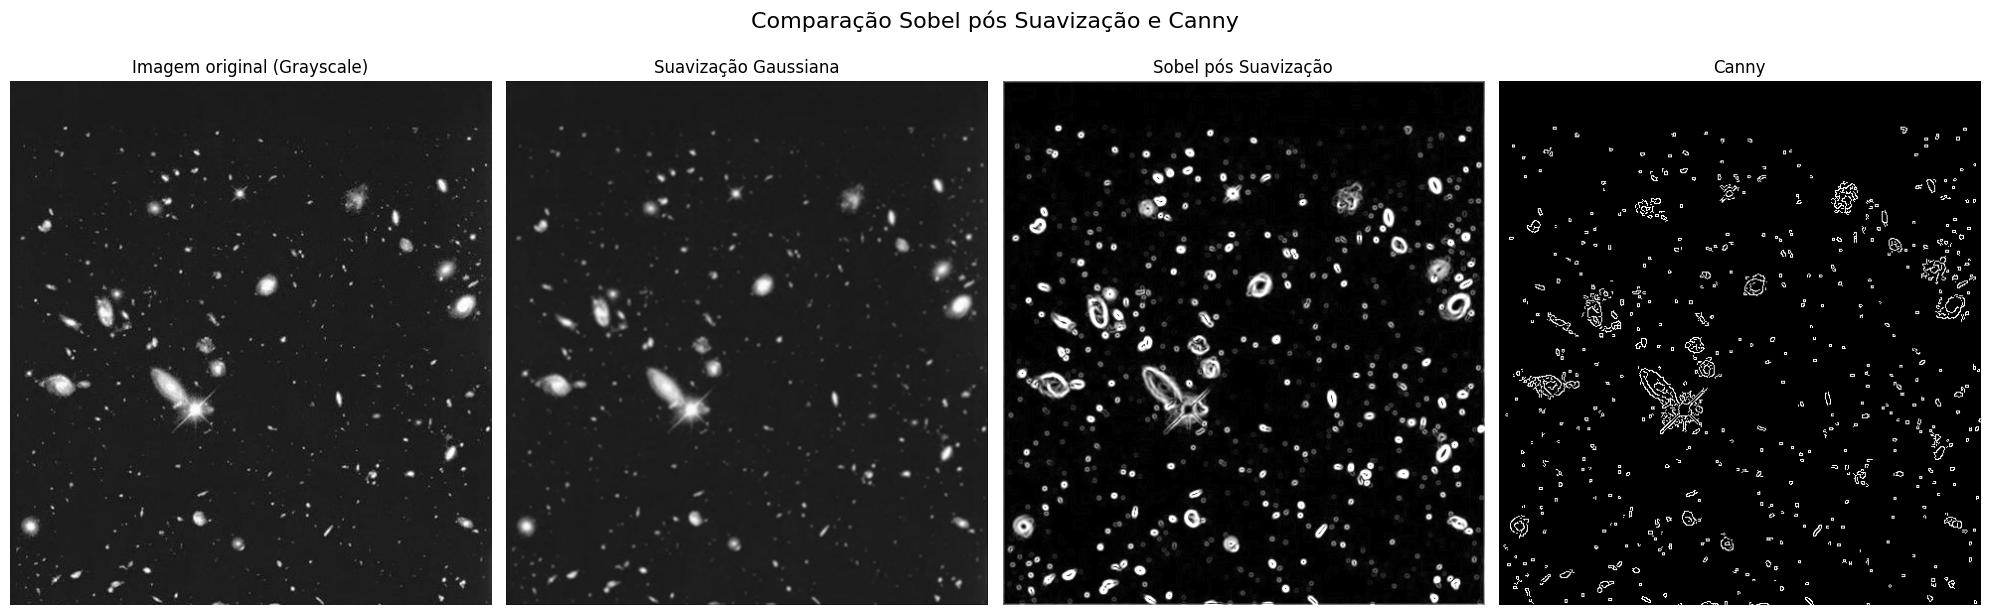

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 9))
fig.suptitle("Comparação Sobel pós Suavização e Canny", y=0.85, fontsize=16)

axs[0].imshow(img_grayscale, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Imagem original (Grayscale)")
axs[0].axis("off")

gauss_kernel = gauss_create(3,3,sigma=30)
blurred_img = conv2d(img_grayscale.astype(float), gauss_kernel, padding=True, floatOut=True)
blurred_img_uint8 = np.clip(blurred_img, 0, 255).astype(np.uint8)
axs[1].imshow(blurred_img_uint8, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Suavização Gaussiana")
axs[1].axis("off")

sobel_on_blurred = sobel_create_apply(blurred_img_uint8)
axs[2].imshow(sobel_on_blurred, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Sobel pós Suavização")
axs[2].axis("off")

canny_img = cv2.Canny(img_grayscale, 50, 150)
axs[3].imshow(canny_img, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("Canny")
axs[3].axis("off")

plt.tight_layout()
plt.show()